In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import glob
SIZE=256

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
image_directory = '/content/gdrive/MyDrive/testing/batch2/final2_sample/'
image_directorys = glob.glob('/content/gdrive/MyDrive/testing/batch2/final2_sample/*.jpg')


In [ ]:
print(len(image_directorys))

100


In [ ]:

# from google.colab import files
 
 
# uploaded = files.upload()

In [ ]:
#Now let us read metadata to get our Y values (multiple lables)
df = pd.read_csv('/content/gdrive/MyDrive/testing/batch2/MultilabelNone.csv')    
print(df.head())     # printing first five rows of the file
print(df.columns)

                                      Image  Soil   Sand  Bedrock
0  NLA_397681520EDR_F0020000AUT_04096M1.jpg      1     0        1
1  NLA_397681893EDR_F0020000AUT_04096M1.jpg      1     1        0
2  NLA_398919855EDR_F0030078NCAM00303M1.jpg      0     1        1
3  NLA_398920122EDR_F0030078NCAM00303M1.jpg      1     0        1
4  NLA_399365236EDR_F0030100NCAM00403M1.jpg      0     0        1
Index(['Image', 'Soil ', 'Sand', 'Bedrock'], dtype='object')


In [ ]:
df = df.iloc[:]  #Loading only first 1000 datapoints for memory reasons 
#Need to read images using the tag from metadata.
#Otherwise, if read directly from the folder then images may not correspond to 
#the metadata from the csv file. 

In [ ]:
df.columns

Index(['Image', 'Soil ', 'Sand', 'Bedrock'], dtype='object')

In [ ]:
X_dataset = []  
for i in tqdm(range(df.shape[0])):
    img = image.load_img(image_directory +df['Image'][i], target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)
    
X = np.array(X_dataset)

100%|██████████| 100/100 [00:03<00:00, 30.35it/s]


In [ ]:
y = np.array(df.drop(['Image'],axis=1))


In [ ]:
print(df['Image'][79])

NLA_402562728EDR_F0050000NCAM00445M1.jpg


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="sigmoid", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="sigmoid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins. 

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat).

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 252, 252, 16)      1216      
                                                                 
 batch_normalization_8 (Batc  (None, 252, 252, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 126, 126, 16)     0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 126, 126, 16)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 122, 122, 32)      12832     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 61, 61, 32)      

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [ ]:
#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label. 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/25
1/1 [==============================] - 10s 10s/step - loss: 0.8325 - accuracy: 0.3714 - val_loss: 0.7014 - val_accuracy: 0.5667
Epoch 2/25
1/1 [==============================] - 7s 7s/step - loss: 0.7129 - accuracy: 0.3429 - val_loss: 0.6851 - val_accuracy: 0.5667
Epoch 3/25
1/1 [==============================] - 7s 7s/step - loss: 0.7318 - accuracy: 0.3857 - val_loss: 0.6715 - val_accuracy: 0.5667
Epoch 4/25
1/1 [==============================] - 7s 7s/step - loss: 0.6619 - accuracy: 0.3429 - val_loss: 0.6650 - val_accuracy: 0.5667
Epoch 5/25
1/1 [==============================] - 7s 7s/step - loss: 0.6794 - accuracy: 0.2714 - val_loss: 0.6585 - val_accuracy: 0.5667
Epoch 6/25
1/1 [==============================] - 7s 7s/step - loss: 0.6707 - accuracy: 0.2571 - val_loss: 0.6530 - val_accuracy: 0.1333
Epoch 7/25
1/1 [==============================] - 7s 7s/step - loss: 0.6666 - accuracy: 0.3000 - val_loss: 0.6488 - val_accuracy: 0.1333
Epoch 8/25
1/1 [=======================

Plot the training and validation accuracy and loss at each epoch

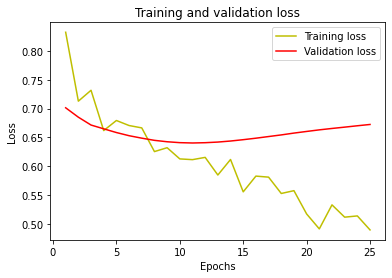

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
history.history

{'accuracy': [0.37142857909202576,
  0.34285715222358704,
  0.3857142925262451,
  0.34285715222358704,
  0.27142858505249023,
  0.2571428716182709,
  0.30000001192092896,
  0.4714285731315613,
  0.44285714626312256,
  0.41428571939468384,
  0.4571428596973419,
  0.4000000059604645,
  0.44285714626312256,
  0.37142857909202576,
  0.41428571939468384,
  0.37142857909202576,
  0.4285714328289032,
  0.44285714626312256,
  0.4000000059604645,
  0.44285714626312256,
  0.41428571939468384,
  0.4714285731315613,
  0.4714285731315613,
  0.4285714328289032,
  0.4571428596973419],
 'loss': [0.8325295448303223,
  0.7129486203193665,
  0.731844425201416,
  0.6619006395339966,
  0.6794039011001587,
  0.6706690788269043,
  0.6665735244750977,
  0.6254644393920898,
  0.6321956515312195,
  0.6127625703811646,
  0.611488938331604,
  0.6154114007949829,
  0.584811270236969,
  0.6117604374885559,
  0.5556154251098633,
  0.5829311013221741,
  0.5811259746551514,
  0.5527859330177307,
  0.5576666593551636,


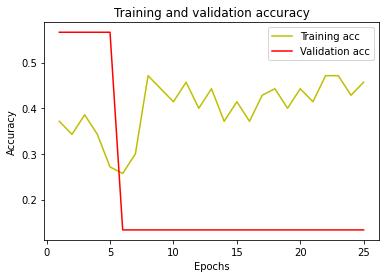

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Validate on an image

Soil 0.7541554
Sand 0.32735533
Bedrock 0.8767582


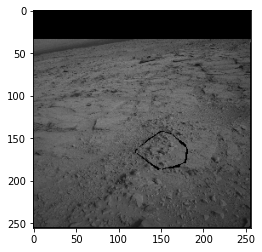

In [ ]:
img = image.load_img('/content/gdrive/MyDrive/testing/batch2/final2_sample/NLA_401317063EDR_F0042002NCAM00431M1.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
cat=["Soil","Sand","Bedrock"]
for i in proba:
  x=0
  for category in i:
    print(cat[x],category)
    x+=1
    

Accuracy


In [ ]:

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

1/1 [==============================] - 1s 711ms/step - loss: 0.6725 - accuracy: 0.1333
Accuracy =  13.333334028720856 %
